In [2]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [3]:
# Load crime data set into pandas
crime_data = pd.read_csv("../Resources/crime_data.csv")
crime_data.head()

,year,population,violent crime,violent crime rate,murder and non-negligent manslaughter,murder and non-negligent manslaughter rate,rape,rape rate,robbery,robbery rate,aggravated assault,aggravated assault rate,property crime,property crime rate,burglary,burglary rate,larceny-theft,larceny-theft rate,motor vehicle theft,motor vehicle theft rate
0,1994.0,260327021.0,1857670.0,713.6,23326.0,9.0,102216.0,39.3,618949.0,237.8,1113179.0,427.6,12131873.0,4660.2,2712774.0,1042.1,7879812.0,3026.9,1539287.0,591.3
1,1995.0,262803276.0,1798792.0,684.5,21606.0,8.2,97470.0,37.1,580509.0,220.9,1099207.0,418.3,12063935.0,4590.5,2593784.0,987.0,7997710.0,3043.2,1472441.0,560.3
2,1996.0,265228572.0,1688540.0,636.6,19645.0,7.4,96252.0,36.3,535594.0,201.9,1037049.0,391.0,11805323.0,4451.0,2506400.0,945.0,7904685.0,2980.3,1394238.0,525.7
3,1997.0,267783607.0,1636096.0,611.0,18208.0,6.8,96153.0,35.9,498534.0,186.2,1023201.0,382.1,11558475.0,4316.3,2460526.0,918.8,7743760.0,2891.8,1354189.0,505.7
4,1998.0,270248003.0,1533887.0,567.6,16974.0,6.3,93144.0,34.5,447186.0,165.5,976583.0,361.4,10951827.0,4052.5,2332735.0,863.2,7376311.0,2729.5,1242781.0,459.9


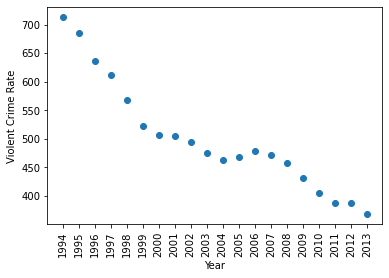

In [4]:
# Generate a scatter plot of violent crime rate versus year
year = crime_data.iloc[:,0]
violent_crime_rate = crime_data.iloc[:,3]
plt.scatter(year,violent_crime_rate)
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.show()

In [5]:
# Perform a linear regression on year versus violent crime rate
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, violent_crime_rate)

In [6]:
# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * year + vc_int

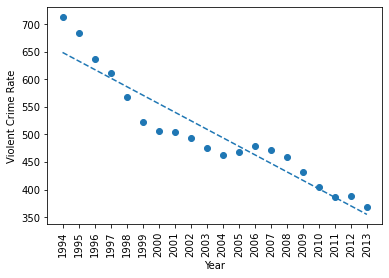

In [7]:
# Plot the linear model on top of scatter plot 
year = crime_data.iloc[:,0]
violent_crime_rate = crime_data.iloc[:,3]
plt.scatter(year,violent_crime_rate)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.show()

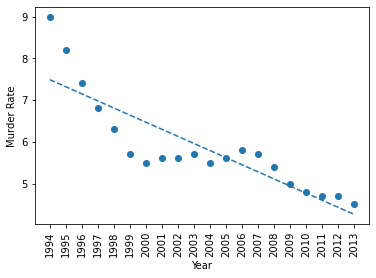

In [8]:
# Repeat plotting scatter and linear model for year versus murder rate
murder_rate = crime_data.iloc[:, 5]
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(year, murder_rate)
m_fit = m_slope * year + m_int
plt.scatter(year,murder_rate)
plt.plot(year,m_fit,"--")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Murder Rate')
plt.show()

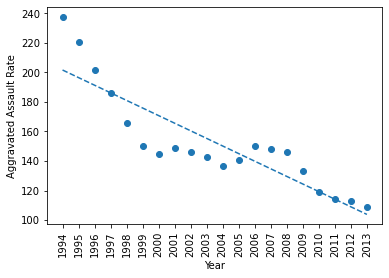

In [9]:
# Repeat plotting scatter and linear model for year versus aggravated assault
aggravated_assault_rate = crime_data.iloc[:, 9]
aa_slope, aa_int, aa_r, aa_p, aa_std_err = stats.linregress(
    year, aggravated_assault_rate)
aa_fit = aa_slope * year + aa_int
plt.scatter(year,aggravated_assault_rate)
plt.plot(year,aa_fit,"--")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Aggravated Assault Rate')
plt.show()

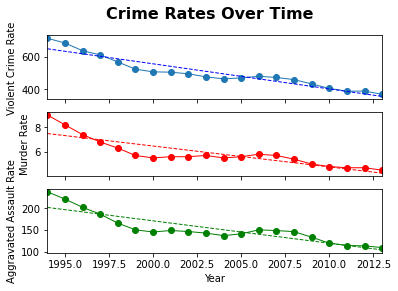

In [10]:
# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(year), max(year))
ax1.plot(year, violent_crime_rate, linewidth=1, marker="o")
ax1.plot(year, vc_fit, "b--", linewidth=1)
ax1.set_ylabel("Violent Crime Rate")

ax2.plot(year, murder_rate, linewidth=1, marker="o", color="r")
ax2.plot(year, m_fit, "r--", linewidth=1)
ax2.set_ylabel("Murder Rate")

ax3.plot(year, aggravated_assault_rate, linewidth=1, marker="o", color="g")
ax3.plot(year, aa_fit, "g--", linewidth=1)
ax3.set_ylabel("Aggravated Assault Rate")
ax3.set_xlabel("Year")

plt.show()

In [11]:
# Calculate the crime rates for 2019
year = 2019
print(f"The violent crime rate in 2019 will be {round(vc_slope * year + vc_int,2)}.")
print(f"The murder rate in 2019 will be {round(m_slope * year + m_int,2)}.")
print(f"The aggravated assault rate in 2019 will be {round(aa_slope * year + aa_int,2)}.")

The violent crime rate in 2019 will be 262.21.
The murder rate in 2019 will be 3.24.
The aggravated assault rate in 2019 will be 72.87.
